In [43]:
#Import necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [44]:
pip install --upgrade scikit-learn threadpoolctl

In [45]:
#Load the dataset
data = pd.read_csv("Mall_Customers.csv")
data = data.drop(['CustomerID'],axis=1)


In [46]:
#Inspect the data 
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [48]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [49]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [50]:
 #To Check for Duplicates
duplicated=data[data.duplicated]
len(duplicated)    

0

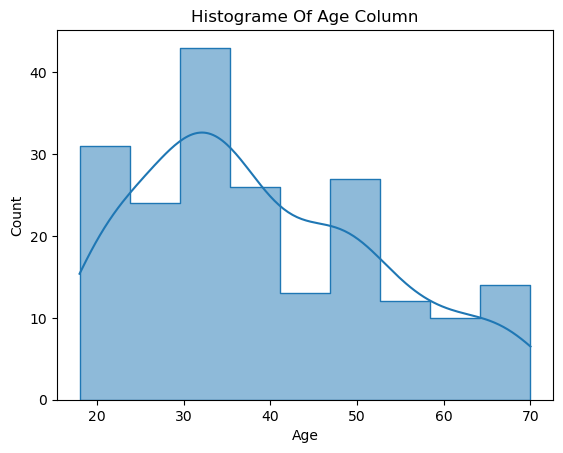

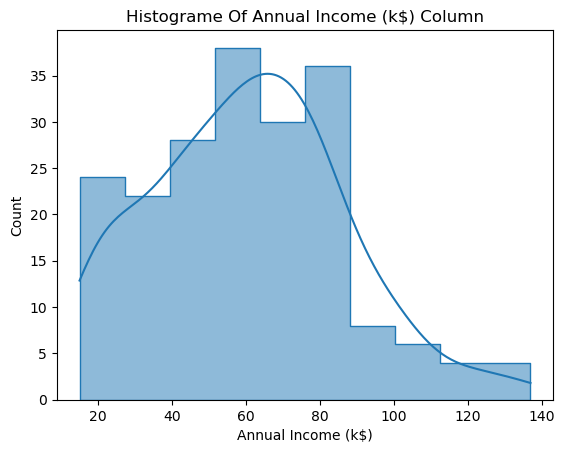

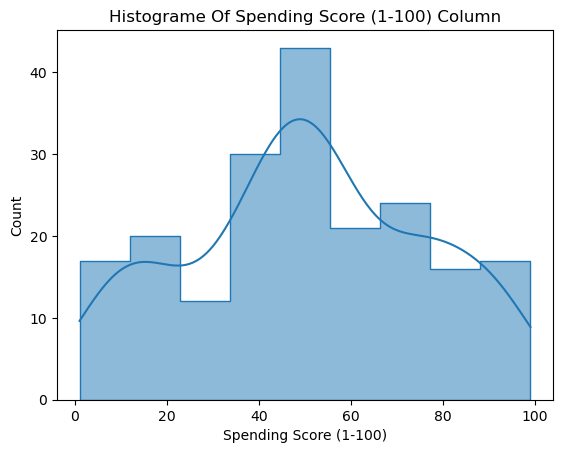

In [51]:
cols=['Age','Annual Income (k$)','Spending Score (1-100)']
for col in cols:
    sns.histplot(data=data,x=col,kde=True,element='step')
    plt.xlabel(col)
    plt.title(f"Histograme Of {col} Column")
    plt.show()

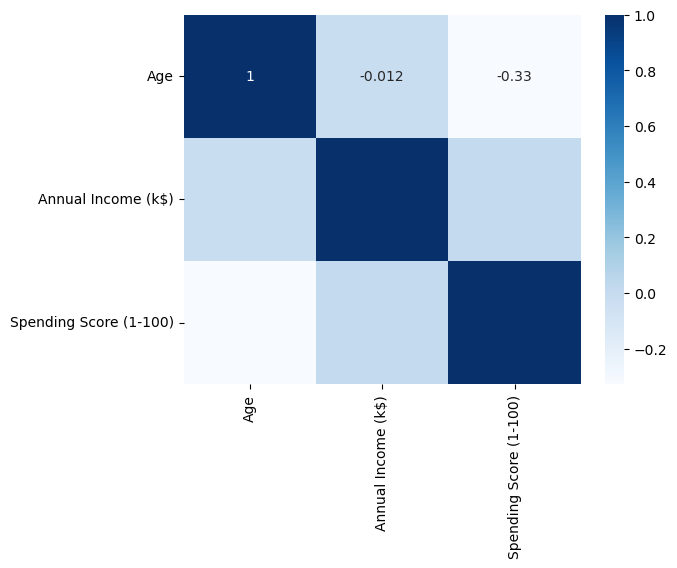

In [52]:
correlation = data.select_dtypes('int','float').corr()
sns.heatmap(correlation,annot=True,cmap='Blues')
plt.show()

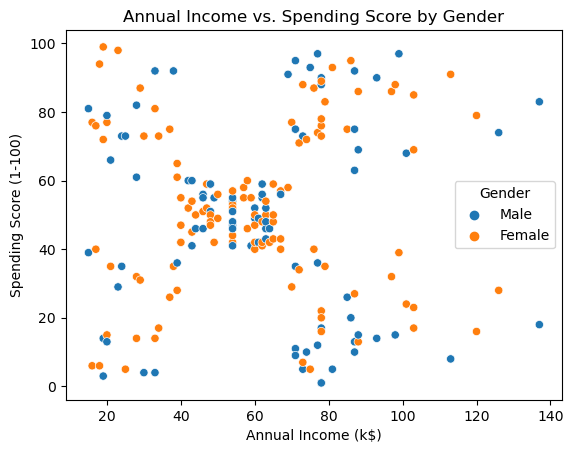

In [53]:
sns.scatterplot(data=data,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Gender')
plt.title("Annual Income vs. Spending Score by Gender")
plt.show()

In [54]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [55]:
print(data.columns)


Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [56]:
inertia = []
K_values=range(1,11)
for i in K_values:
    model = KMeans(n_clusters=i)
    model.fit_predict(data)
    inertia.append(model.inertia_)

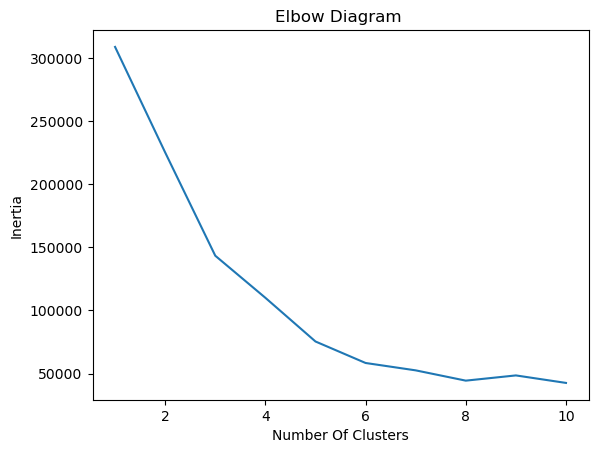

In [57]:
plt.plot(K_values,inertia)  
plt.title("Elbow Diagram ")
plt.xlabel("Number Of Clusters")
plt.ylabel("Inertia")
plt.show()

In [58]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(data)

In [59]:
clusters

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

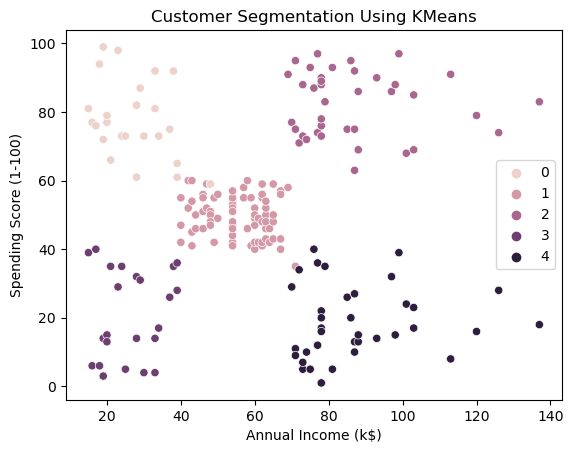

In [60]:
sns.scatterplot(data=data,x='Annual Income (k$)',y='Spending Score (1-100)',hue=clusters)
plt.title("Customer Segmentation Using KMeans")
plt.show()